In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [5 1 0 2 2 5 8 3 7 8]


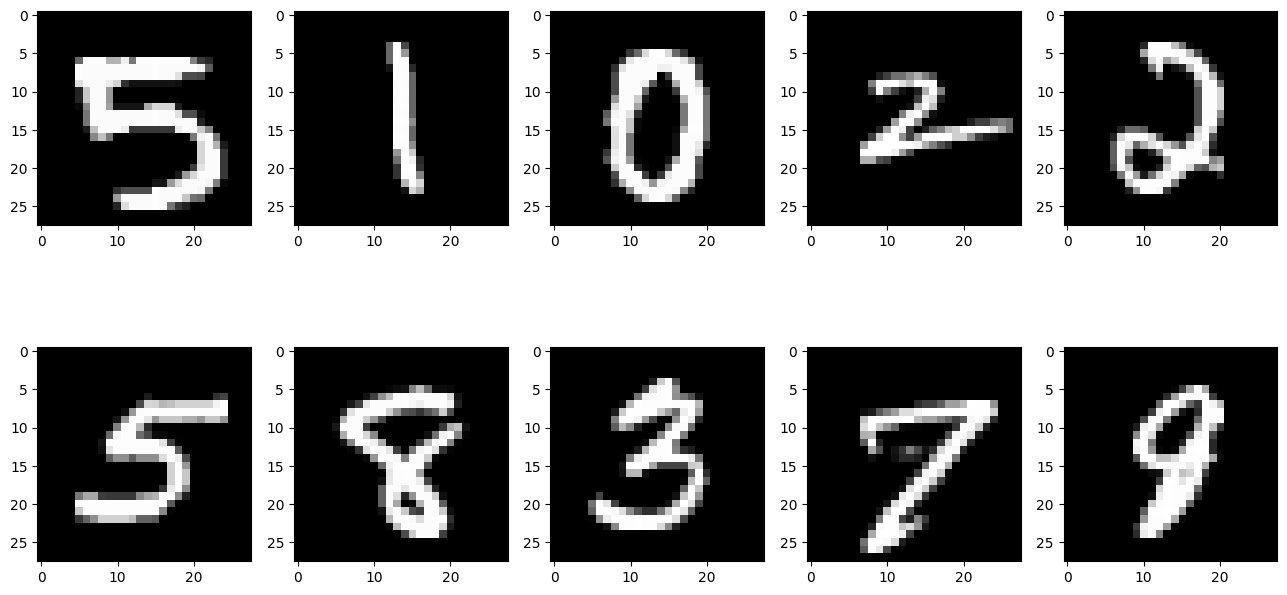

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56810 (221.91 KB)
Trainable params: 56810 (221.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2795 - accuracy: 0.9171
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1283 - accuracy: 0.9609
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0973 - accuracy: 0.9698
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0769 - accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0638 - accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0551 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0472 - accuracy: 0.9848
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0413 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0376 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.033

Plot the loss and accuracy graphs

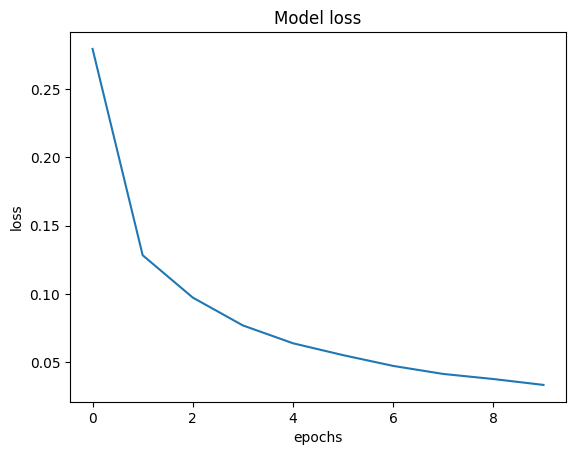

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

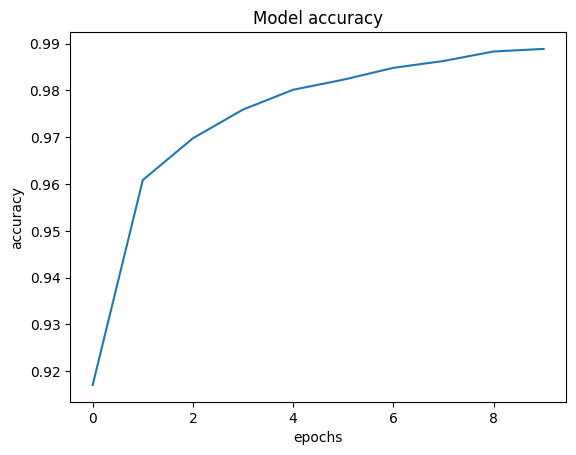

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0969 - accuracy: 0.9742
Loss of the Test dataset is: 0.09691175073385239
Accuracy of the test dataset is: 0.9742000102996826


Save the model weights

In [11]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

Epoch 1/20
375/375 [==============================] - 11s 26ms/step - loss: 2.2462 - accuracy: 0.8861 - val_loss: 0.7637 - val_accuracy: 0.9221
Epoch 2/20
375/375 [==============================] - 6s 16ms/step - loss: 0.6594 - accuracy: 0.9302 - val_loss: 0.5446 - val_accuracy: 0.9428
Epoch 3/20
375/375 [==============================] - 8s 20ms/step - loss: 0.5088 - accuracy: 0.9456 - val_loss: 0.4620 - val_accuracy: 0.9521
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.4486 - accuracy: 0.9518 - val_loss: 0.4201 - val_accuracy: 0.9585
Epoch 5/20
375/375 [==============================] - 8s 21ms/step - loss: 0.4134 - accuracy: 0.9566 - val_loss: 0.3982 - val_accuracy: 0.9589
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.3926 - accuracy: 0.9591 - val_loss: 0.3813 - val_accuracy: 0.9593
Epoch 7/20
375/375 [==============================] - 7s 19ms/step - loss: 0.3819 - accuracy: 0.9599 - val_loss: 0.3742 - val_accuracy: 0.960

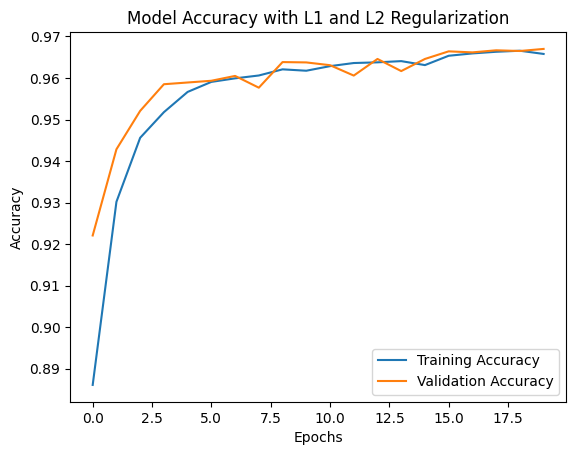

313/313 [==============================] - 1s 3ms/step


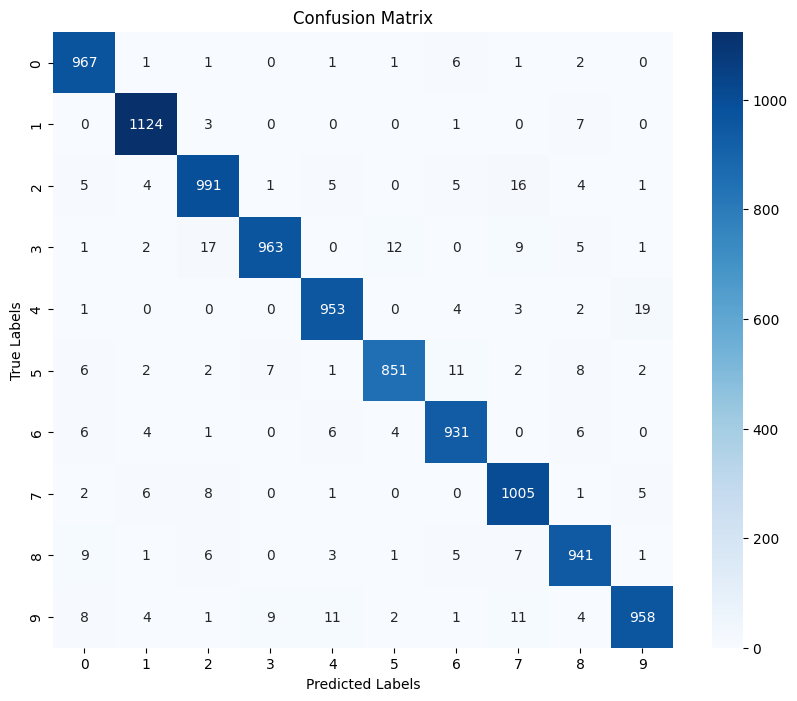

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a new MLP model with L1 and L2 regularization
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])

# Compile the model with a different learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs and batch size
train_info = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss of the Test dataset is: {loss}')
print(f'Accuracy of the test dataset is: {accuracy}')

# Plot training accuracy
plt.plot(train_info.history['accuracy'], label='Training Accuracy')
plt.plot(train_info.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with L1 and L2 Regularization')
plt.legend()
plt.show()

# Generate predictions and compute the confusion matrix
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_labels_classes = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(test_labels_classes, test_predictions_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
375/375 [==============================] - 12s 6ms/step - loss: 0.3090 - accuracy: 0.9074 - val_loss: 0.1388 - val_accuracy: 0.9583
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1199 - accuracy: 0.9630 - val_loss: 0.0920 - val_accuracy: 0.9722
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0866 - accuracy: 0.9726 - val_loss: 0.0896 - val_accuracy: 0.9739
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0661 - accuracy: 0.9795 - val_loss: 0.0822 - val_accuracy: 0.9768
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0551 - accuracy: 0.9827 - val_loss: 0.0833 - val_accuracy: 0.9772
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0471 - accuracy: 0.9848 - val_loss: 0.0853 - val_accuracy: 0.9769
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0430 -

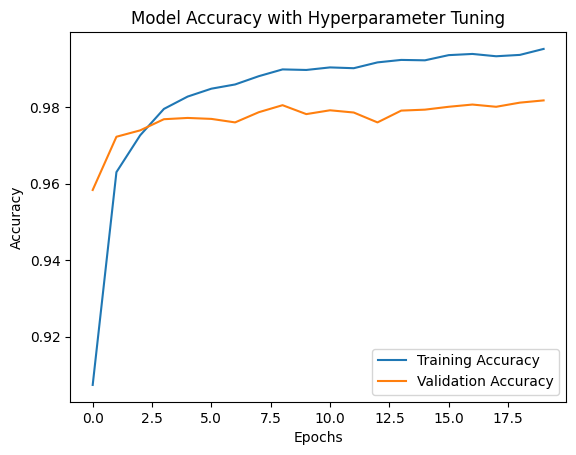

313/313 [==============================] - 1s 3ms/step


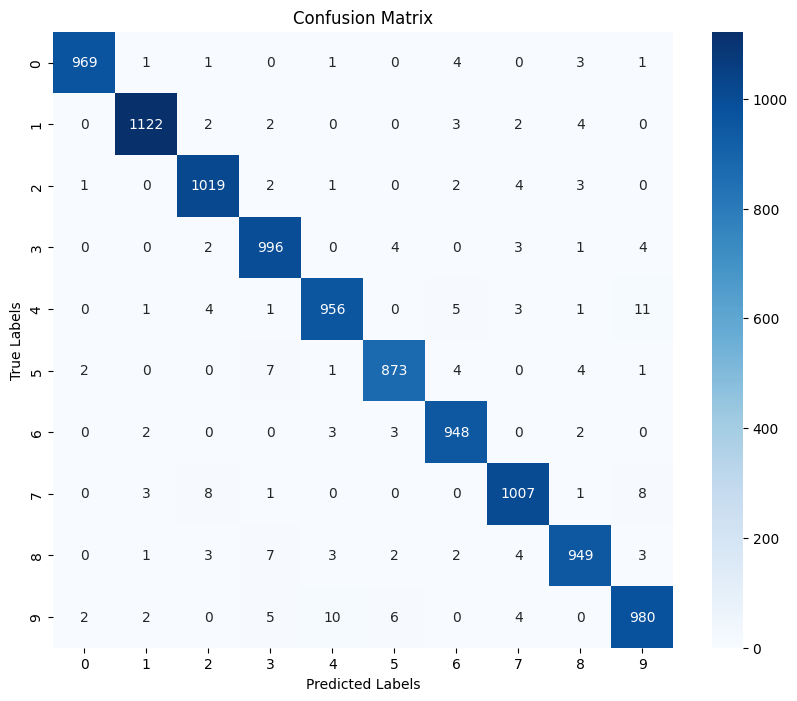

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define hyperparameters
learning_rate = 0.001
batch_size = 128
epochs = 20

# Define a new MLP model with adjusted hyperparameters
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
train_info = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss of the Test dataset is: {loss}')
print(f'Accuracy of the test dataset is: {accuracy}')

# Plot training accuracy
plt.plot(train_info.history['accuracy'], label='Training Accuracy')
plt.plot(train_info.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Hyperparameter Tuning')
plt.legend()
plt.show()

# Generate predictions and compute the confusion matrix
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_labels_classes = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(test_labels_classes, test_predictions_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
